In [19]:
import warnings

# Ignore UserWarning for QDA
warnings.simplefilter("ignore", UserWarning)

import os

dir = str(os.getcwd())
split_dir = dir.split('\\')

# Set the github repository directory
for folder in reversed(split_dir):
    if folder != 'AA_Project_G6' and 'AA_Project_G6' in split_dir:
        os.chdir(os.path.dirname(os.getcwd()))
    else:
        break

print('Current directory:', os.getcwd())

Current directory: c:\Users\AndreLopes\Desktop\git\AA_Project_G6


# **Data Import**

In [20]:
import pandas as pd
import numpy as np

# Import data from .csv file
df = pd.read_csv(filepath_or_buffer='./data/processed/data_processed.csv', delimiter=',')

# **Training and Testing Data Split**

In [21]:
from sklearn.model_selection import train_test_split, KFold

# Create the input and output matrices, split in training and testing subsets
y = df.copy()['Attrition_Flag_Existing Customer']
X = df.copy().drop(columns=['Attrition_Flag_Existing Customer'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# **Logistic Regression Model**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Create the Logistic Regression model and fit the data to it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

## Predict the classification and print the confusion matrix
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

## Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(log_reg.classes_)) if log_reg.classes_[i] == 1]
y_logistic_pred = log_reg.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 1).copy()


                       Actual
                 Churned |  Existing
 Predicted Churned:  249 | 107
Predicted Existing:  207 | 2476

Success Rate: 89.67%
Error Rate: 10.33%


# **Linear Discriminant Analysis Model**

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the Linear Discriminand Analysis model and fit the data to it
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = LDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(28))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(LDA.classes_)) if LDA.classes_[i] == 1]
y_LDA_pred = LDA.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()


                      Actual
                Churned  |  Existing
 Predicted Churned:  284 | 121
Predicted Existing:  172 | 2462

Success Rate: 90.36%
Error Rate: 9.64%


# **Quadratic Discriminant Analysis Model**

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Create the model and fit the data to it
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = QDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(QDA.classes_)) if QDA.classes_[i] == 1]
y_QDA_pred = QDA.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()


                       Actual
                Churned  |  Existing
 Predicted Churned:  240 | 197
Predicted Existing:  216 | 2386

Success Rate: 86.41%
Error Rate: 13.59%


# **Gaussian Naive Bayes Model**

In [25]:
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes model and fit the data to it
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = GNB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print success rate
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(GNB.classes_)) if GNB.classes_[i] == 1]
y_GNB_pred = GNB.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()


                       Actual
                Churned  |  Existing
 Predicted Churned:  285 | 141
Predicted Existing:  171 | 2442

Success Rate: 89.73%
Error Rate: 10.27%


# **KNN Model**

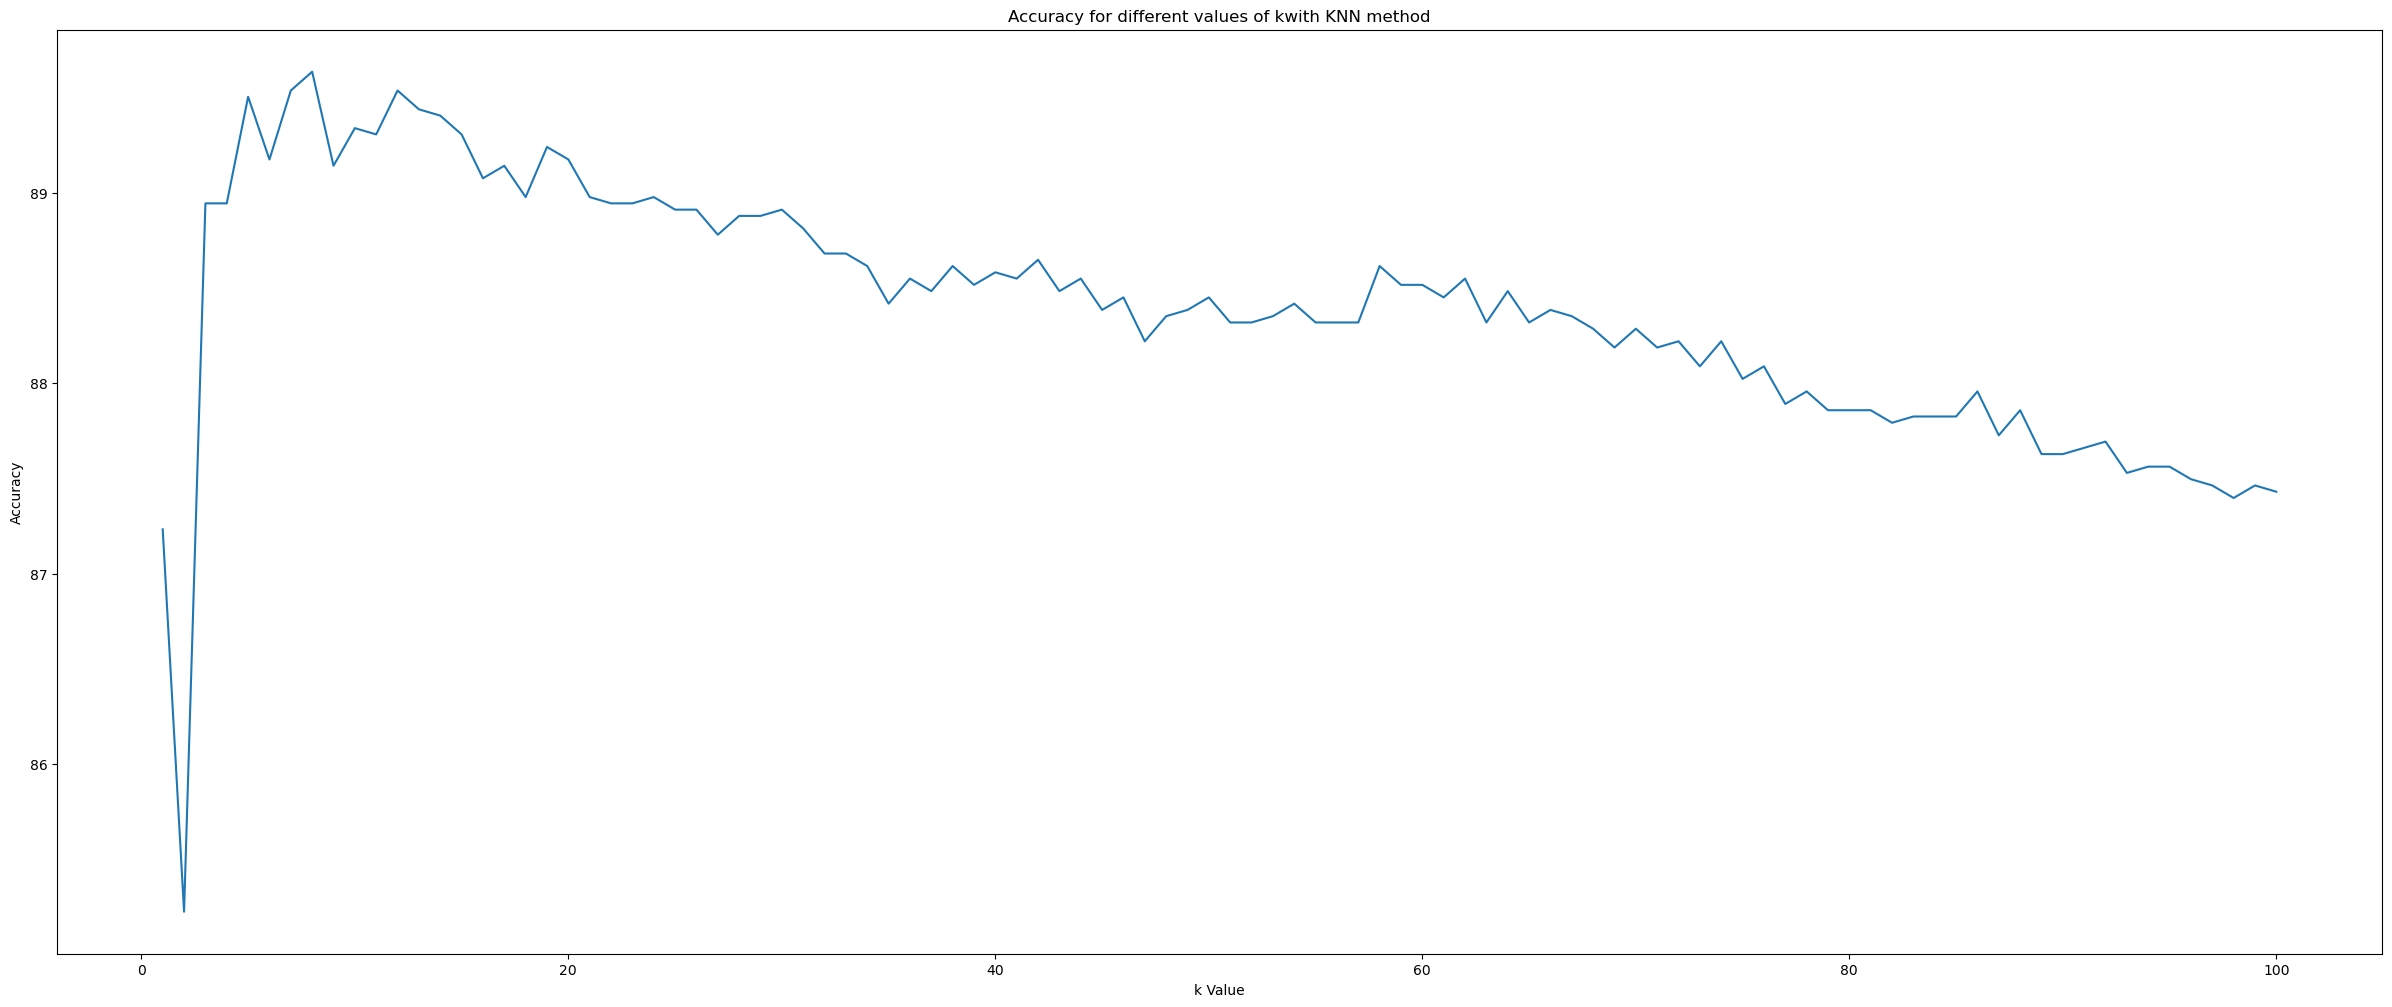


                       Actual
                Churned  |  Existing
 Predicted Churned:  275 | 134
Predicted Existing:  181 | 2449

Success Rate: 89.63%
Error Rate: 10.37%


In [26]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):

    # Create the KNN model and fit the data to it
    KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN.fit(X_train, y_train)

    # Predict the classification and print the confusion matrix
    y_pred = KNN.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100
    
    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(29))
        print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
        print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
        print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))
        # Print success rate
        print('\nSuccess Rate: {:.2f}%'.format(accuracy_val))
        print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))


    return KNN, accuracy_val

# Initialize a list to store the accuracies
accuracies = []
knn_limit = 100

# Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1, verbosity=0)
    accuracies.append(accuracy_val)

# Plot the results
plt.subplots(figsize=(30, 12))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of kwith KNN method')
plt.show()

# Find best K value for KNN model
max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)+1

# Store the necessary variables for ROC/AUC
KNN, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=max_index, verbosity=1)
cols_to_store = [i for i in range(len(KNN.classes_)) if KNN.classes_[i] == 1]
y_KNN_pred = KNN.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()

# **AUC scores and ROC curves**

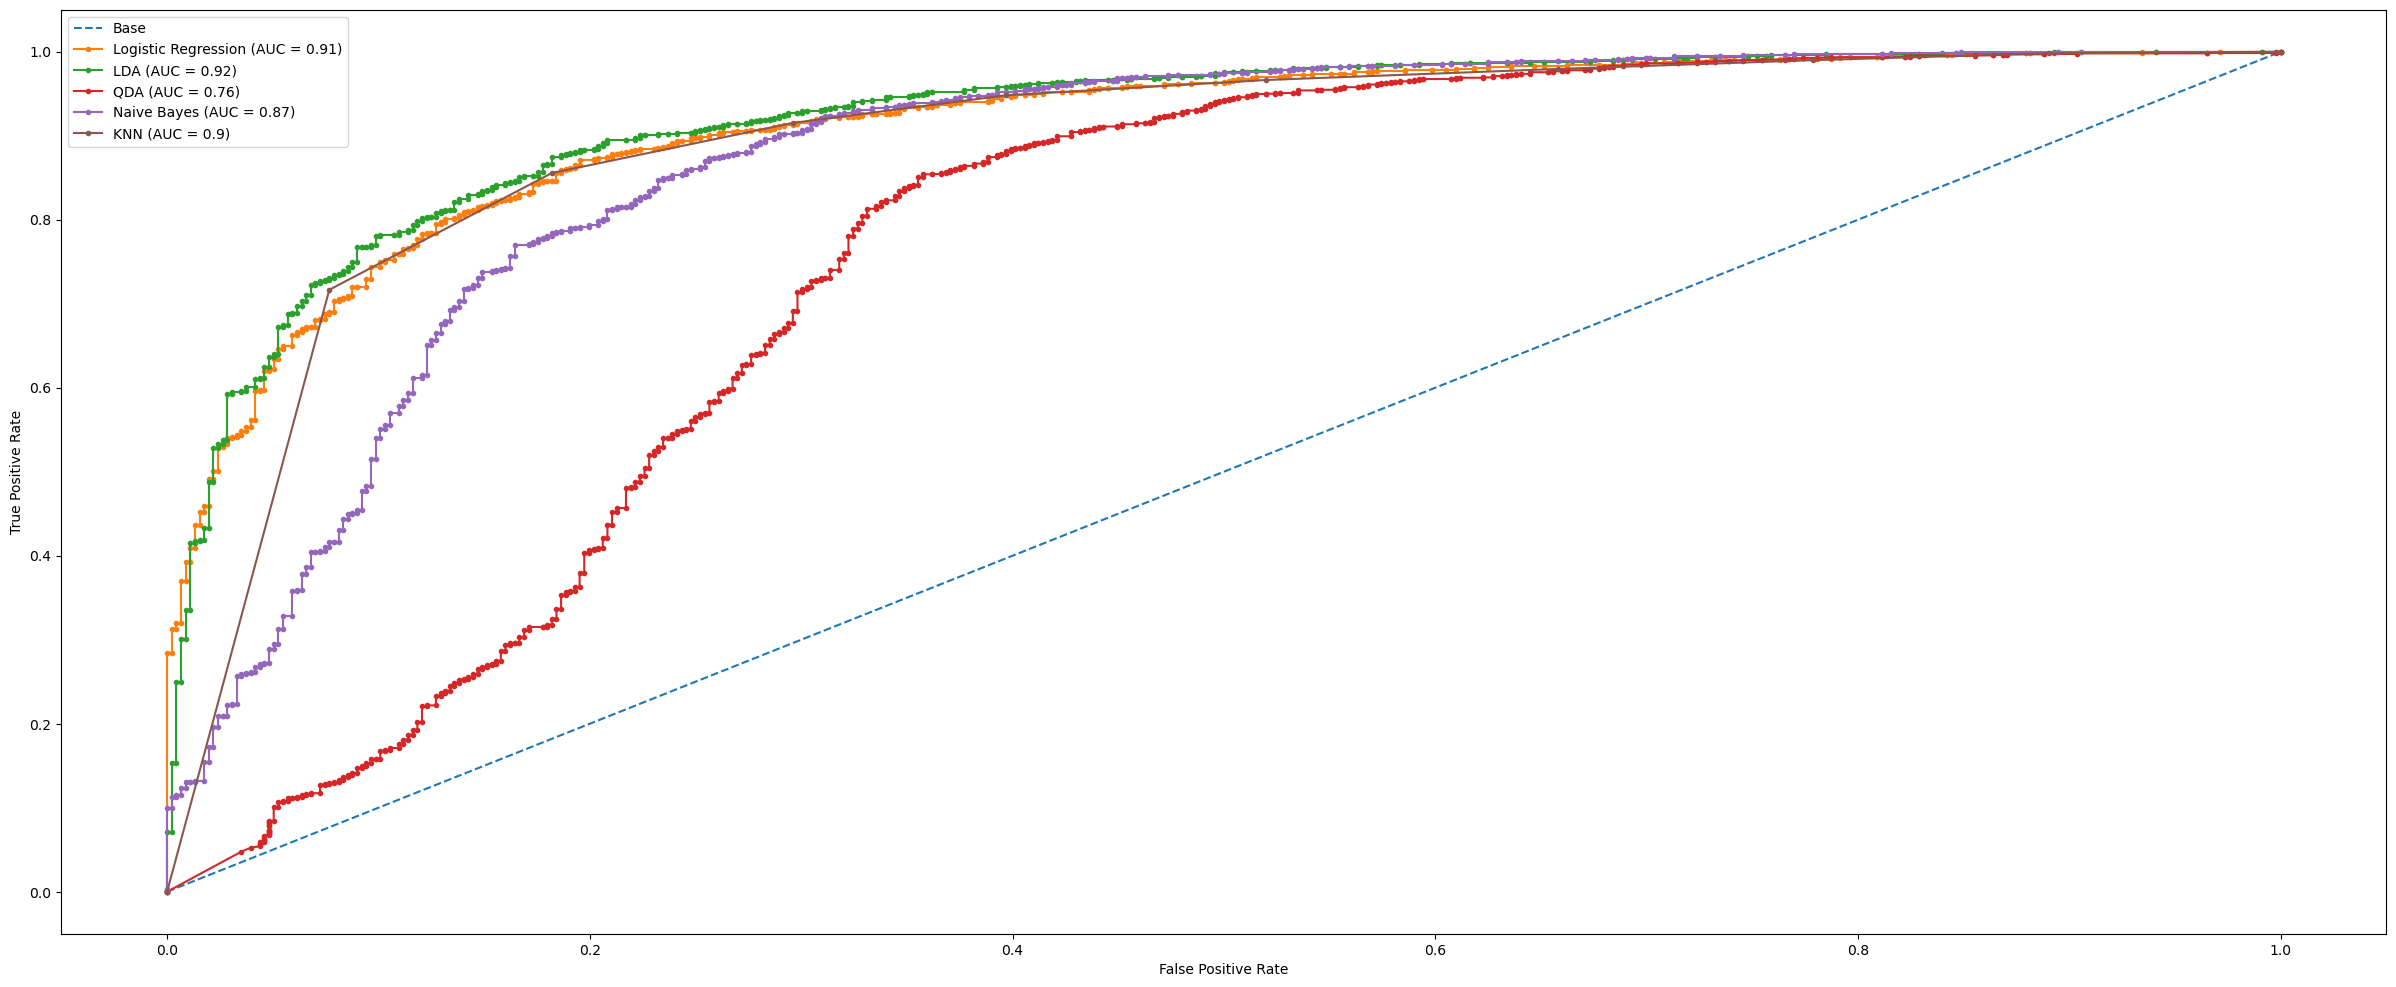

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)

# Plot the ROC curve for the models
plt.subplots(figsize=(30, 12))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression (AUC = ' + str(np.round(roc_auc_score(y_logistic_true, y_logistic_pred),2)) + ')')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA (AUC = ' + str(np.round(roc_auc_score(y_LDA_true, y_LDA_pred),2)) + ')')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA (AUC = ' + str(np.round(roc_auc_score(y_QDA_true, y_QDA_pred),2)) + ')')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes (AUC = ' + str(np.round(roc_auc_score(y_GNB_true, y_GNB_pred),2)) + ')')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN (AUC = ' + str(np.round(roc_auc_score(y_KNN_true, y_KNN_pred),2)) + ')')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **K-Fold Cross Validation**

In [28]:
from sklearn.metrics import mean_squared_error

# K-Fold Cross Validation
def kfold(regr, X, y, verbosity):
    # If verbosity = 1 show the plots

    mse_all = []
    kf = KFold(n_splits=10, random_state=0, shuffle=True)

    for train, test in kf.split(X):
        X_train = X.values[train]
        X_test = X.values[test]
        y_train = y[train]
        y_test = y[test]

        regr.fit(X_train,y_train)
        y_pred = regr.predict(X_test)
        mse = mean_squared_error(y_pred,y_test)
            
        mse_all.append(mse)

    means = [np.mean(mse_all) for i in np.arange(1,11)]

    #Plot mean squared error for all folds of cross validation
    if verbosity == 1:
        plt.rcParams['figure.figsize'] = [15, 9]

        i=1
        for mse_val in mse_all:
            plt.plot(i, mse_val,'o', label='CV ' + str(i) + ' (MSE = ' + str(round(mse_val,2)) + ')')
            i+=1
        plt.plot(np.arange(1,11),means, label='Mean = ' + str(round(means[0],2)), color='r', linestyle='-')
        plt.legend()
    else:
        None

    return np.mean(means)

mean_log_reg = kfold(log_reg, X, y, 0)
mean_LDA = kfold(LDA, X, y, 0)
mean_QDA = kfold(QDA, X, y, 0)
mean_GNB = kfold(GNB, X, y, 0)
mean_KNN = kfold(KNN, X, y, 0)

print('Mean square error:\n' + 
      'Logistic Regression: ' + str(round(mean_log_reg,2)) + '\n' + 
      'Linear Discriminant Analysis: ' + str(round(mean_LDA,2)) + '\n' + 
      'Quadratic Discriminant Analysis: ' + str(round(mean_QDA,2)) + '\n' + 
      'Gaussian Naive Bayes: ' + str(round(mean_GNB,2)) + '\n' + 
      'K-Nearest Neighbors: ' + str(round(mean_KNN,2)))

Mean square error:
Logistic Regression: 0.11
Linear Discriminant Analysis: 0.09
Quadratic Discriminant Analysis: 0.13
Gaussian Naive Bayes: 0.1
K-Nearest Neighbors: 0.1
